In [61]:
import pandas as pd
import requests

# Fetch the data.
df_original = pd.read_csv("https://ourworldindata.org/grapher/carbon-footprint-travel-mode.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/carbon-footprint-travel-mode.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [62]:
df = df_original.copy()
df.head()

,Entity,Code,Year,transport_emissions_factor
0,Bus (average),NaN,2022,96.50
1,Bus (local London),NaN,2022,79.36
2,Coach (bus),NaN,2022,27.33
3,Diesel car,NaN,2022,170.82
4,Domestic flight,NaN,2022,245.87


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects
print("Import libraries done.")

Import libraries done.


In [64]:
type(df)

pandas.core.frame.DataFrame

In [65]:
transport_emissions_factor = df['transport_emissions_factor'].values
transport_emissions_factor

array([ 96.5 ,  79.36,  27.33, 170.82, 245.87,  47.09,   4.46,  18.74,
        27.81, 147.87, 113.55,  35.49, 170.48,  68.4 , 151.02,  28.61])

In [66]:
entity = df['Entity'].values
entity

array(['Bus (average)', 'Bus (local London)', 'Coach (bus)', 'Diesel car',
       'Domestic flight', 'Electric car', 'Eurostar (to Paris)',
       'Ferry (foot passenger)', 'London Underground', 'Long-haul flight',
       'Motorbike', 'National rail', 'Petrol car', 'Plug-in hybrid',
       'Short-haul flight', 'Tram'], dtype=object)

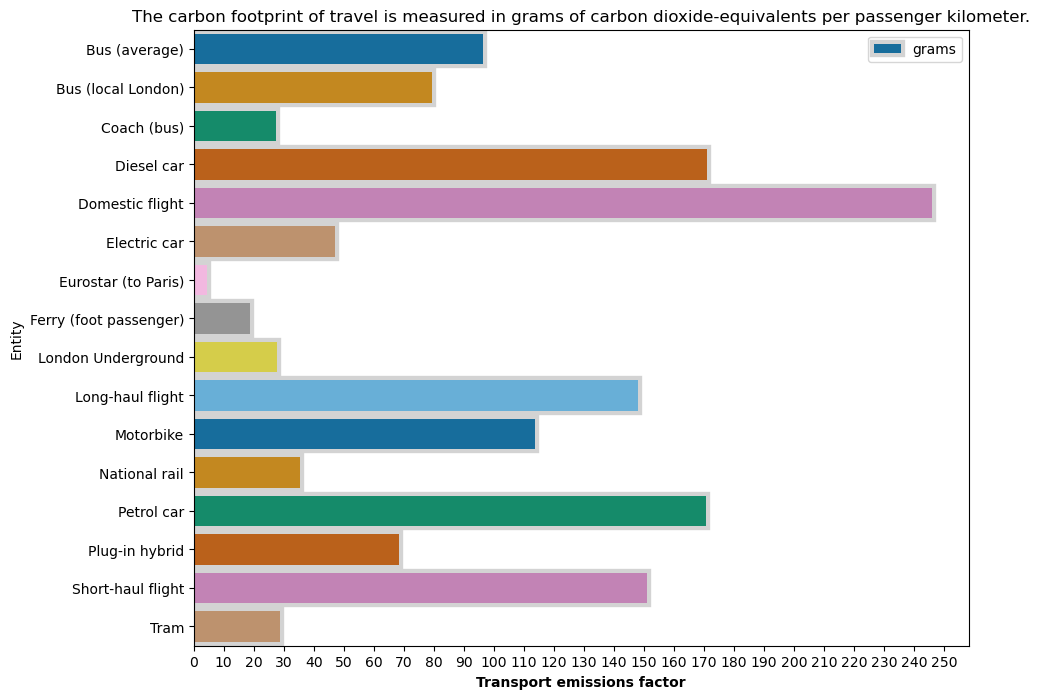

In [76]:
fig, ax = plt.subplots(figsize=(10,8))
bars = sns.barplot(x="transport_emissions_factor",y='Entity',data=df, palette='colorblind', ax=ax, label='grams')
for bar in bars.patches:
    bar.set_path_effects([
        path_effects.withStroke(linewidth=6, foreground="lightgray"),  # shadow
        path_effects.Normal()                                         # normal fill
    ])
xmin, xmax = ax.get_xlim()

ax.set_xticks(np.arange(int(xmin), int(xmax)+1, 10))

ax.set_title('The carbon footprint of travel is measured in grams of carbon dioxide-equivalents per passenger kilometer.')
ax.set_xlabel('Transport emissions factor', fontweight='bold')
plt.legend()
plt.savefig("/Users/mexmex/Documents/3-Math_LU/HT2025/BERN02/Exercise 5/ranking_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>